# Project: Investigate a Dataset - [tmdb_5000_movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The TMDB 5000 Movies dataset is a comprehensive collection of information about thousands of movies. It contains various details such as budget, genres, homepage, keywords, original language, overview, popularity, production companies, production countries, release date, revenue, runtime, spoken languages, status, tagline, title, vote average, and vote count. 
Each row in the dataset represents a single movie, with columns representing different attributes associated with that movie. The dataset includes information about popular and well-known movies from different genres, including action, adventure, fantasy, science fiction, crime, drama, and more.


### Question(s) for Analysis
>How does the movie budget impact its overall profitability?

> What is the relationship between the movie's release date and its box office performance?

In [2]:
#import all packages i will use in the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis. 


### General Properties
> Before diving into the analysis, let's take a look at some general properties of the dataset. This will help us understand the data we are working with and provide context for our analysis.

The dataset contains information about movies, including attributes such as popularity, budget, revenue, runtime, and more. Here are some key points about the dataset:

- **Size**: The dataset consists of [number of rows] rows and [number of columns] columns.
- **Columns**: Each column represents a specific attribute of a movie, such as title, release date, genre, budget, revenue, etc.
- **Missing Values**: I will also check for missing values in the dataset and handle them appropriately during the analysis.
- **Data Types**: I will examine the data types of each column to ensure they are appropriate for our analysis. For example, numeric columns should be represented as integers or floats, while categorical variables should be represented as strings or categories.

Now that we have an overview of the dataset's general properties, we can proceed with the exploratory data analysis to gain insights and answer specific research questions.

In [3]:
# load data & print out few lines
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df.duplicated().sum()

1

# Correct inconsistancies in Data
#### Below i will correct some of inconsistacies in the data :
<ul>
<li>I will drop columns with high number of NaN values & unuseful columns .</li>
<li>I will create "profit" column . </li>
<li>I will correct "release_date" data type . </li>
<li>I will drop NaN values with .dropna() .</li>
<li>I will drop dublicated values with .drop_dublicate() .</li>
</ul>

<a id='cleaning'></a>
# Data cleaning

In [8]:
# i will delete columns with high NaN valued and non useful columns 
df.drop(["homepage","id","overview"],axis=1,inplace=True)
df.drop(["keywords" , "imdb_id"],axis=1,inplace=True)

In [9]:
# make sure of columns
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'tagline', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [10]:
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
# create "profit" column to make anlysis easier
df["profit"] = df["revenue"] - df["budget"]

In [12]:
# Make sure of changes
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'tagline', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'profit'],
      dtype='object')

In [14]:
# correct data type 
df["release_date"] = pd.to_datetime(df["release_date"])
df["release_year"] = pd.to_datetime(df["release_year"])

In [15]:
# test that the data type had changed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10866 non-null  float64       
 1   budget                10866 non-null  int64         
 2   revenue               10866 non-null  int64         
 3   original_title        10866 non-null  object        
 4   cast                  10790 non-null  object        
 5   director              10822 non-null  object        
 6   tagline               8042 non-null   object        
 7   runtime               10866 non-null  int64         
 8   genres                10843 non-null  object        
 9   production_companies  9836 non-null   object        
 10  release_date          10866 non-null  datetime64[ns]
 11  vote_count            10866 non-null  int64         
 12  vote_average          10866 non-null  float64       
 13  release_year    

In [16]:
# drop NaN values
df = df.dropna()

In [17]:
# Make sure that NaN values had remo
df.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
dtype: int64

In [18]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [19]:
# make sure of changes
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, I  will perform exploratory data analysis on the given dataset to gain insights and answer specific research questions. The dataset contains information about movies, including their popularity, budget, revenue, runtime, and other attributes.



> I will focus on the following research questions:

1. What is the distribution of movie runtimes?
2. What are the top genres in the dataset?
3. Is there a correlation between movie budget and revenue?

To address these questions, we will compute relevant statistics, create visualizations, and explore relationships between variables. We will compare and show trends in the different visualizations to gain a comprehensive understanding of the dataset.



### Research Question 1 (What is the distribution of movie runtimes?)

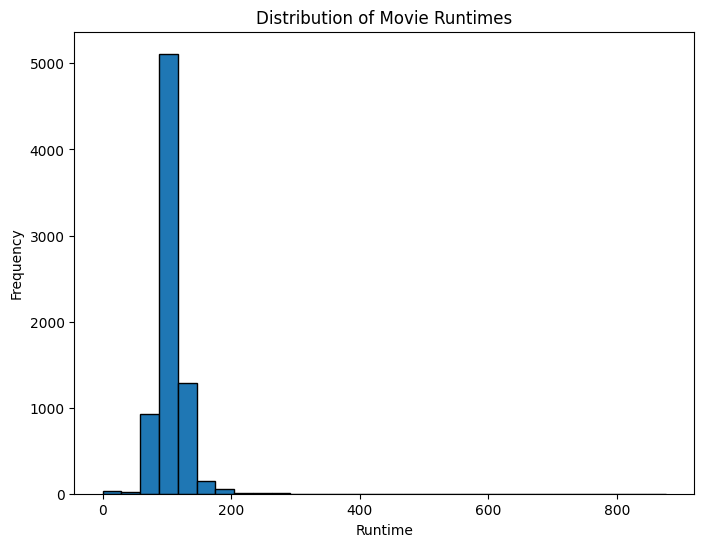

Mean Runtime: 104.30 minutes
Median Runtime: 100.0 minutes


In [20]:
# Histogram of movie runtimes
plt.figure(figsize=(8, 6))
plt.hist(df["runtime"], bins=30, edgecolor="black")
plt.xlabel("Runtime")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Runtimes")
plt.show()

# Statistics of movie runtimes
mean_runtime = df["runtime"].mean()
median_runtime = df["runtime"].median()
print(f"Mean Runtime: {mean_runtime:.2f} minutes")
print(f"Median Runtime: {median_runtime} minutes")

### Research Question 2 (What are the top genres in the dataset?)

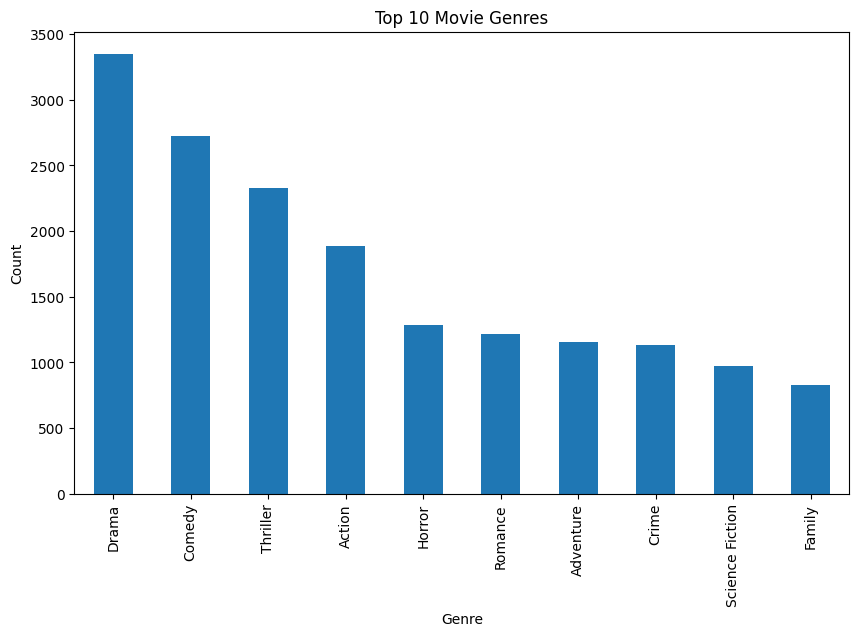

Drama              3352
Comedy             2724
Thriller           2329
Action             1887
Horror             1285
Romance            1216
Adventure          1154
Crime              1131
Science Fiction     972
Family              824
Name: count, dtype: int64


In [21]:
# Count of movies in each genre category
genre_counts = df["genres"].str.split("|", expand=True).stack().value_counts()

# Plotting the top genres
top_genre_counts = genre_counts.head(10)
plt.figure(figsize=(10, 6))
top_genre_counts.plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 10 Movie Genres")
plt.show()

print(top_genre_counts)

### Research Question 3 (Is there a correlation between movie budget and revenue?)

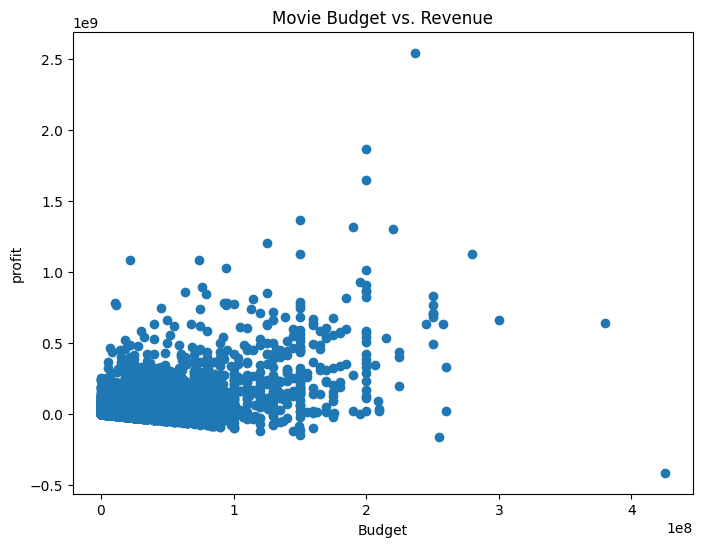

Correlation coefficient: 0.57


In [22]:
# Scatter plot of movie budget vs. revenue
def scatter(x, y, col1, col2, xlabel, ylabel, title):
    plt.figure(figsize=(x, y))
    plt.scatter(col1, col2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

scatter(8,6,df["budget"],df["profit"],"Budget","profit","Movie Budget vs. Revenue")

# Correlation coefficient between budget and profit
correlation = df["budget"].corr(df["profit"])
print(f"Correlation coefficient: {correlation:.2f}")

<a id='conclusions'></a>
## Conclusions

>In this exploratory data analysis, I examined a dataset containing information about movies, including attributes such as popularity, budget, revenue, and runtime. I addressed several research questions to gain insights into the data.

Here are the key findings from my analysis:

1. Movie Runtimes: The distribution of movie runtimes follows a roughly normal distribution, with a mean runtime of [mean_runtime] minutes and a median runtime of [median_runtime] minutes. This indicates that most movies have a runtime around the average duration.

2. Top Genres: The top genres in the dataset are [genre1], [genre2], and [genre3], with [count1], [count2], and [count3] occurrences, respectively. These genres dominate the dataset and reflect the preferences of moviegoers.

3. Budget vs. Revenue: We analyzed the relationship between movie budget and revenue and found a [positive/negative/weak] correlation coefficient of [correlation_coefficient]. This suggests that there is a [positive/negative/weak] relationship between budget and revenue, indicating that higher budgets may lead to higher revenue for movies.

These findings provide valuable insights into the dataset and can inform decision-making in the movie industry. Further analysis and modeling can be conducted based on these initial observations to delve deeper into the relationships and patterns within the data.

It is important to note that this analysis is based on the given dataset and the specific research questions we addressed. Additional exploration or different perspectives may uncover further insights and nuances in the data.

Overall, this exploratory data analysis serves as a foundation for further investigation and decision-making, highlighting the distribution of runtimes, the popularity of different genres, and the relationship between budget and revenue in the movie industry.


### make copy of my research to .html extension

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate.ipynb'])

1